In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('wiki.jpg',0)
print(img)

cv2.imshow('image',img)  
cv2.waitKey(0)  
cv2.destroyAllWindows()  

[[151 141 145 ... 170 176 174]
 [160 143 134 ... 148 150 147]
 [140 146 148 ... 140 145 143]
 ...
 [146 130 136 ... 146 146 143]
 [142 127 134 ... 146 146 143]
 [140 124 133 ... 146 146 143]]


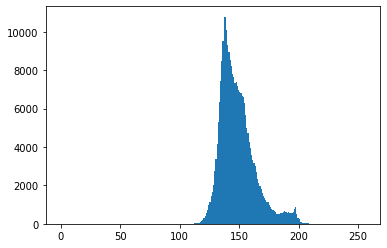

In [13]:
plt.hist(img.ravel(),256,[0,256]);
plt.show()

In [17]:
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))

cv2.imshow('image_after_hist',equ)  
cv2.waitKey(0)  
cv2.destroyAllWindows() 

cv2.imwrite('wiki_after.jpg',res)

True

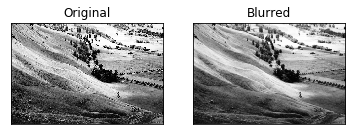

In [24]:
equ_rgb = cv2.cvtColor(equ,cv2.COLOR_BGR2RGB)

blur = cv2.GaussianBlur(equ_rgb,(5,5),0)  

plt.subplot(121),plt.imshow(equ_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

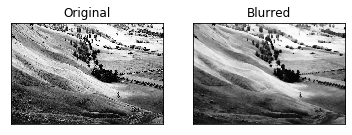

In [23]:
equ_rgb = cv2.cvtColor(equ,cv2.COLOR_BGR2RGB)

median = cv2.medianBlur(equ_rgb,5)  

plt.subplot(121),plt.imshow(equ_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


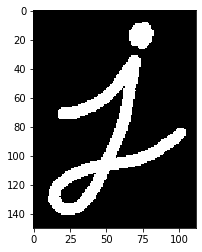

In [36]:
imgj = cv2.imread('j.png',0)
print(imgj)
j_rgb = cv2.cvtColor(imgj,cv2.COLOR_BGR2RGB)
plt.imshow(j_rgb)
plt.show()

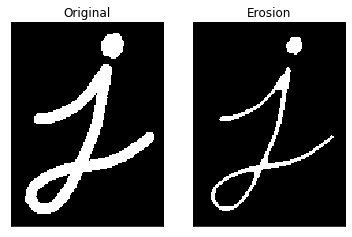

In [32]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(j_rgb,kernel,iterations = 1)

plt.subplot(121),plt.imshow(j_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Erosion')
plt.xticks([]), plt.yticks([])
plt.show()

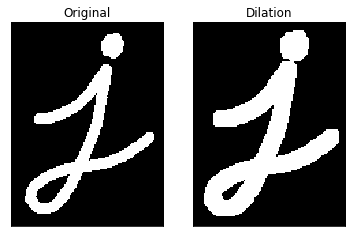

In [33]:
dilation = cv2.dilate(j_rgb,kernel,iterations = 1)

plt.subplot(121),plt.imshow(j_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title('Dilation')
plt.xticks([]), plt.yticks([])
plt.show()

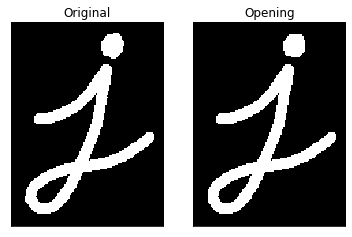

In [34]:
opening = cv2.morphologyEx(j_rgb, cv2.MORPH_OPEN, kernel)

plt.subplot(121),plt.imshow(j_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening),plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.show()

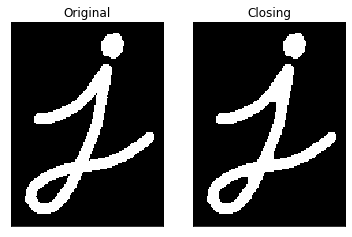

In [35]:
closing = cv2.morphologyEx(j_rgb, cv2.MORPH_CLOSE, kernel)

plt.subplot(121),plt.imshow(j_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

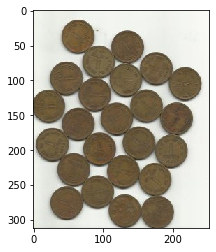

In [44]:
img = cv2.imread('water_coins.jpg')
# print(img)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [62]:
img = cv2.imread('water_coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

cv2.imshow('thresh',thresh)  
cv2.waitKey(0)  
cv2.destroyAllWindows() 

In [73]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,1,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

cv2.imshow('sure_bg',sure_bg)  
cv2.waitKey(0)  
cv2.destroyAllWindows()

In [74]:
# Marker labelling
ret, markers1 = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers1+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers3 = cv2.watershed(img,markers)
img[markers3 == -1] = [255,0,0]

cv2.imshow('img',img)  
cv2.waitKey(0)  
cv2.destroyAllWindows()